Department of Physics, University of Pisa AA 2019-2020)

### Multimessenger Physics Laboratory tutorial series



## Tutorial 2 - Reading FITS files
#### (Massimiliano Razzano, Nov. 28, 2019)

In this tutorial we will see how to use Python to read and manipulate FITS files. To this scope we will use the Astropy package, and we will see how to read and manipulate FITS tables and images.

As usual, let's start with basic imports...

In [1]:
#import Numpy
import os
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

### Le't retrieve the data
The data are stored in a "data" directory at the same level of the "code" directory where you are now. Let's do some work to navigate the directory...
We will use the *os* module, in particular the *os.path* submodule.

**Note**: In this case we define the directories directly in this notebook, instead of using environment variables. For this examples, it is easier...

### Get the data file
As before, we will use git clone

In [4]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/code
Main directory is /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio
data dir is /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data


### Bonus: Can i list directory contents?
Let's suppose you want to know how many fits files are in the data directory.
We can use the *glob* module for it and use it to list files..

In [6]:
import glob

#in glob we put the items to seach, such as: data/*fits
fits_file_list = glob.glob(os.path.join(data_dir,"*.fits"))

#here we go!
print(fits_file_list)

['/datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data/fermi_lat_3fgl_gll_psc_v16.fits', '/datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data/horse_head_image.fits']


### Read and write FITS files
We use as an example the Fermi LAT 4 year Catalog (3FGL) of gamma-ray sources detected by the Fermi Large Area Telescope.

More details in "FERMI LARGE AREA TELESCOPE THIRD SOURCE CATALOG", Acero et al. (Fermi-LAT Collaboration), 2015, ApJS.

We will use the Astropy module

In [7]:
#define the input file
input_filename = os.path.join(data_dir,"fermi_lat_3fgl_gll_psc_v16.fits")

#First, you can open the file and check the information in it
fits_info = fits.open(input_filename)

#...like the number of HDU, in this case 5
fits_info.info()

Filename: /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data/fermi_lat_3fgl_gll_psc_v16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    463   3034R x 77C   [18A, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, 16A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, E, E, E, D, E, 48E, 96E, 18A, 17A, 18A, 18A, 18A, 15A, 14A, 15A, A, 21A, 5A, 26A, 26A, I]   
  2  ROIs          1 BinTableHDU    108   840R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  3  Hist_Start    1 BinTableHDU     43   49R x 1C   [D]   
  4  GTI           1 BinTableHDU    126   22858R x 2C   [D, D]   
  5  ExtendedSources    1 BinTableHDU     74   25R x 11C   [15A, 18A, E, E, E, E, 14A, E, E, E, 18A]   


In [8]:
#Now, we want to read the HDU 1. We can do by specifying the ext parameter
data, header = fits.getdata(input_filename, ext=1,header=True)

#and we can look at the header
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1082 / length of dimension 1                          
NAXIS2  =                 3034 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   77 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [9]:
#We can access all the header information, like in this case the Declination
header["TTYPE3"]

'DEJ2000'

In [10]:
#and we can rename it
header["TTYPE3"] = "DEC_J2000"
header["TTYPE3"]

'DEC_J2000'

In [11]:
#you can now save the modified file with writeto function
fits.writeto(os.path.join(work_dir,'output_file.fits'), data, header, overwrite=True)

#Check that the file is there and it contains the new header

<h2>Read and manipulate FITS Tables</h2>
Fits tables are commonly used to store list of sources (catalogs) or of events, e.g. gamma-ray photons. 
Here we look at a FITS files containing data from the blazar 3C279 as observed by the Large Area Telescope onboard Fermi

In [15]:
input_table_filename = os.path.join(data_dir,"lat_photons_3c279.fits")

#First, you can open the file and check the information in it
fits_table_hdu = fits.open(input_table_filename)

#...like the number of HDU, in this case 5
fits_table_hdu.info()

Filename: /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data/lat_photons_3c279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    211   12150R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   152R x 2C   [D, D]   


In [16]:
#We will look at the EVENTS table (HDU=1)
table_header = fits_table_hdu[1].header
table_data = fits_table_hdu[1].data
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1082 / length of dimension 1                          
NAXIS2  =                 3034 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   77 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [17]:
#we can access the columns definitions
fits_table_hdu[1].columns

ColDefs(
    name = 'ENERGY'; format = 'E'; unit = 'MeV'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'L'; format = 'E'; unit = 'deg'
    name = 'B'; format = 'E'; unit = 'deg'
    name = 'THETA'; format = 'E'; unit = 'deg'
    name = 'PHI'; format = 'E'; unit = 'deg'
    name = 'ZENITH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'EARTH_AZIMUTH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'EVENT_ID'; format = 'J'
    name = 'RUN_ID'; format = 'J'
    name = 'RECON_VERSION'; format = 'I'
    name = 'CALIB_VERSION'; format = '3I'
    name = 'EVENT_CLASS'; format = '32X'
    name = 'EVENT_TYPE'; format = '32X'
    name = 'CONVERSION_TYPE'; format = 'I'
    name = 'LIVETIME'; format = 'D'; unit = 's'
    name = 'DIFRSP0'; format = 'E'
    name = 'DIFRSP1'; format = 'E'
    name = 'DIFRSP2'; format = 'E'
    name = 'DIFRSP3'; format = 'E'
    name = 'DIFRSP4'; format = 'E'
)

In [18]:
#Now we convert the data to a Astropy Table object
from astropy.table import Table

evt_data = Table(table_data)
print("Data contains %d events" % len(evt_data))


Data contains 12150 events


In [19]:
evt_data

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
1681.4272,185.72849,1.5148814,286.79135,63.489185,75.070564,144.35333,113.55232,280.00146,255398653.92788732,5334054,255396026,0,0 .. 0,False .. True,False .. False,1,67.48376473784447,0.0,0.0,0.0,0.0,0.0
553.21594,186.60103,1.5401081,288.68594,63.71726,75.29396,143.60551,117.87329,280.8553,255398736.81435892,5499781,255396026,0,0 .. 0,False .. True,False .. False,1,5.310739159584045,0.0,0.0,0.0,0.0,0.0
256.73087,181.36618,4.4490943,275.11252,64.80803,33.496674,135.95435,11.827532,80.60868,255402357.2619038,848373,255402006,0,0 .. 0,False .. True,False .. True,0,69.4829495549202,0.0,0.0,0.0,0.0,0.0
661.3356,182.43748,5.7133036,276.2167,66.39833,33.75322,136.20158,10.097509,79.35028,255402406.49864203,943683,255402006,0,0 .. 0,False .. True,False .. True,0,118.71968778967857,0.0,0.0,0.0,0.0,0.0
137.46126,182.90005,7.958632,274.89023,68.63344,37.00375,275.79742,12.640977,68.577675,255408118.25135598,296756,255407981,0,0 .. 0,False .. True,False .. True,0,134.3187683224678,0.0,0.0,0.0,0.0,0.0
189.72115,187.88354,1.4758874,291.5629,63.90738,44.282825,269.96127,11.246964,116.89998,255408237.7481553,535603,255407981,0,0 .. 0,False .. True,False .. True,0,253.81556764245033,0.0,0.0,0.0,0.0,0.0
474.1261,182.3835,4.267062,277.47827,65.04716,39.06742,260.18085,4.8140464,189.13995,255408329.14456108,717008,255407981,0,0 .. 0,False .. True,False .. False,1,31.159527987241745,0.0,0.0,0.0,0.0,0.0
232.51726,186.95883,0.6784467,289.86874,62.94998,44.122772,264.48056,9.163476,155.53946,255408329.63013545,718015,255407981,0,0 .. 0,False .. True,False .. True,0,31.645102351903915,0.0,0.0,0.0,0.0,0.0
105.049,186.15114,3.2582943,286.73727,65.28285,41.97299,258.55963,9.575446,204.50743,255408447.71427816,945788,255407981,0,0 .. 0,False .. True,False .. False,1,149.72924506664276,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Cnt/bin')

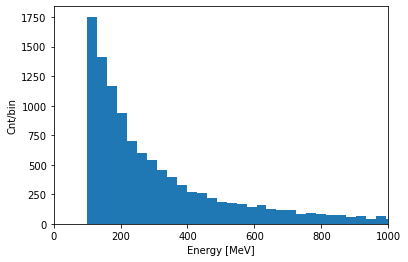

In [20]:
energy_hist = plt.hist(evt_data['ENERGY'], bins='auto')
plt.xlim([0,1000])
plt.xlabel("Energy [MeV]")
plt.ylabel("Cnt/bin")

Text(0, 0.5, 'DEC')

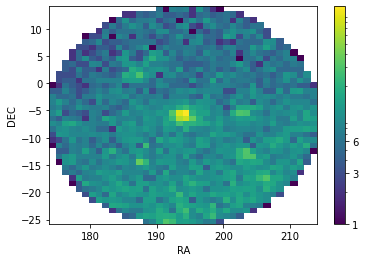

In [21]:
#The observation is selecting photons within a radius of 20 deg, so for 40 deg of diameter we can choose 40 bins, 
#in order to have 1 deg for each bin.

NBINS = (40,40)
img_zero_mpl = plt.hist2d(evt_data['RA'], evt_data['DEC'], NBINS,
                          cmap='viridis', norm=LogNorm())

#Here we can see a source at the center and some other sources on the border

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('RA')
plt.ylabel('DEC')

<h2>Read and display FITS Images</h2>
Fits tables are also very common. Here we use some basic astropy function to get information on images and 
do some basic statistics

In [22]:
input_image_filename = os.path.join(data_dir,"horse_head_image.fits")

#First, you can open the file and check the information in it
fits_image_hdu = fits.open(input_image_filename)

#as before...
fits_image_hdu.info()

Filename: /datawin/University/CorsiUnipi/CorsoMultimessengerLab/GithubClassroom/hw01-python-dataio/data/horse_head_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [23]:
#Usually images are in PRIMARY HDU, do we read it and store in a 2D Numpy
image_data = fits_image_hdu[0].data

#and get the size of the image
image_data.shape

(893, 891)

In [24]:
#We can decide to close the HDU list, since we have in memory all what we want
fits_image_hdu.close()

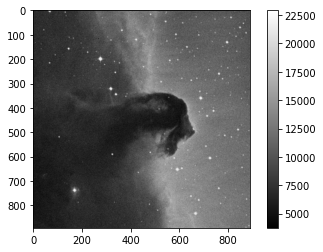

In [25]:
#We can then plot the image
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [26]:
#and get some basic statistics on the image...

print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


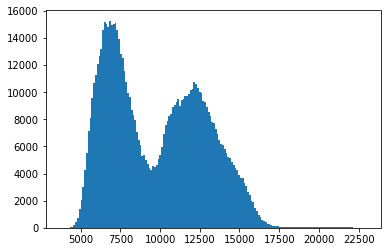

In [27]:
#We can flatten the 2D histogram to a 1D histogram and plot the histogram of the counts
histogram = plt.hist(image_data.flatten(), bins='auto')

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

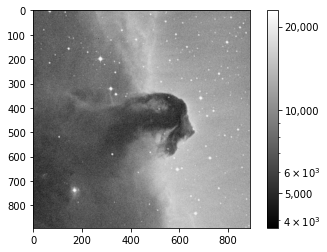

In [28]:
#We can also plot it in logarithmic scale
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])